In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from memory import Memory
from random import random
from model import AMTEA
import numpy as np
import time
from solver import Solver
from task import *
import cProfile
import pstats
import random


In [15]:
np.random.seed(0)
random.seed(0)

In [16]:
import os, shutil
folder = 'cache/solvers'
for filename in os.listdir(folder):
	if filename in ['ga.py', 'de.py']:
		continue
	file_path = os.path.join(folder, filename)

	try:
		if os.path.isfile(file_path) or os.path.islink(file_path):
			os.unlink(file_path)
		elif os.path.isdir(file_path):
			shutil.rmtree(file_path)
	except Exception as e:
		print('Failed to delete %s. Reason: %s' % (file_path, e))

In [17]:
tasks, task_names = get_2_tasks(0)
lst_tasks = tasks

CI_H


In [18]:
for task in lst_tasks:
    print(task.task_name)

CEC_44
CEC_47


In [19]:
# lst_tasks = [GNBGTask(1, 100), GNBGTask(2, 100)]

In [20]:
amtea = AMTEA(pop_size=100, memory_size=10, lst_tasks=lst_tasks, num_solvers=2, alpha=0.2)

Initializing LLM model: gpt
Initial alpha: 0.2
Initializing 0 LLM-based solvers to choose top 2 solvers.
Solver's id: ga, exploit score: 0.7718736373954074, explore score: 0.5707955624872503
Solver's id: ga, exploit score: 0.7836750672199498, explore score: 0.5565535821791882
Solver's id: ga, exploit score: 0.7761315037278996, explore score: 0.5471297362728071
Solver's id: ga, exploit score: 0.7761217235316693, explore score: 0.5520138047434309
Solver's id: ga, exploit score: 0.7882881376758077, explore score: 0.5440685211335214
Solver's id: ga, exploit score: 0.7853282006242035, explore score: 0.562218362008017
Solver ga, eval_score: 0.60041788484906
Solver's id: de, exploit score: 0.7720236420773883, explore score: 0.5638303809300595
Solver's id: de, exploit score: 0.7679770671786472, explore score: 0.5321661319716705
Solver's id: de, exploit score: 0.7656128360742892, explore score: 0.5458271081141943
Solver's id: de, exploit score: 0.775700710343395, explore score: 0.51083141979633

c:\Users\madmo\Workspace\AMTEA\memory\memory.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)
c:\Users\madmo\Workspace\AMTEA\memory\memory.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)


In [ ]:
amtea.run(eval_budget=100000, lp=70, tgap=5, k=10, up=150, delete_after_run=False)

Evaluation count: 100/20000
Alpha: 0.202
Task name: CEC_44
List solvers: ['ga', 'de']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: CEC_47
List solvers: ['ga', 'de']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 1:
{'CEC_44': np.float64(33.53340685156359), 'CEC_47': np.float64(28492.900414485484)}
Evaluation count: 200/20000
Alpha: 0.20402
Task name: CEC_44
List solvers: ['ga', 'de']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: CEC_47
List solvers: ['ga', 'de']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 2:
{'CEC_44': np.float64(22.076537924579792), 'CEC_47': np.float64(28492.900414485484)}
Evaluation count: 300/20000
Alpha: 0.2060602
Task name: CEC_44
List solvers: ['ga', 'de']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: CEC_47
List solvers: ['ga', 'de']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 3:
{'CEC_44': np.float64(22.076537924579792), 'CEC_47': np.float64(28492.90

c:\Users\madmo\Workspace\AMTEA\memory\memory.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)


Solver's id: ga, exploit score: 0.9930960515288143, explore score: 0.07674426363927858
Solver's id: ga, exploit score: 0.9931864902817524, explore score: 0.09739308238717219
Solver's id: ga, exploit score: 0.9933232796077736, explore score: 0.12531429234129046
[*] Evaluation score threshold for new solver: 0.8866995221522661
Solver's id: de, exploit score: 0.9994465980020077, explore score: 0.048033641621298105
Solver's id: de, exploit score: 0.9991055719001581, explore score: 0.11324864257308032
Solver's id: de, exploit score: 0.9994104319594052, explore score: 0.06914519878559153
EVAL CHECK COUNT 1: 1
Solver de, eval_score: 0.8893461558277352
The solver combines a mild use of differential evolution mutation with simulated binary crossover for the parents, emphasizing elite selection and refinement with a strong fusion of exploration.
New solver updated with id: a87h
Solver's id: a87h, exploit score: 0.9966989417323872, explore score: 0.0873328204725429
Solver's id: a87h, exploit scor

c:\Users\madmo\Workspace\AMTEA\memory\memory.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)


Task name: CEC_47
List solvers: ['WLgR', '6stA']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 1:
{'CEC_44': np.float64(1.0492499073231238), 'CEC_47': np.float64(446.74980323056815)}
Evaluation count: 15200/20000
Alpha: 0.8984915668555717
Task name: CEC_44
List solvers: ['de', 'wmbH']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: CEC_47
List solvers: ['WLgR', '6stA']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 2:
{'CEC_44': np.float64(1.0481926910164918), 'CEC_47': np.float64(427.90458352011433)}
Evaluation count: 15300/20000
Alpha: 0.9074764825241275
Task name: CEC_44
List solvers: ['de', 'wmbH']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: CEC_47
List solvers: ['WLgR', '6stA']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 3:
{'CEC_44': np.float64(1.0480615937253517), 'CEC_47': np.float64(427.90458352011433)}
Evaluation count: 15400/20000
Alpha: 0.9165512473493688
Task name: CEC_44
List solver

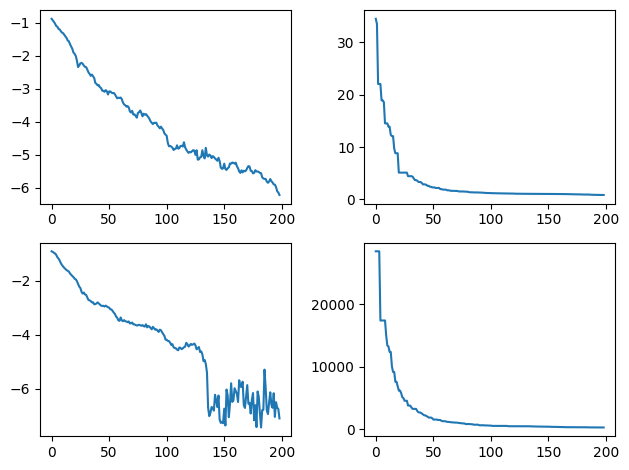

In [22]:
amtea.render_history()

In [23]:
u = np.random.uniform(size=(10, 5))
centroid = np.mean(u, axis=0)
print(centroid)

[0.53676649 0.60543976 0.41086628 0.59828994 0.40461743]


In [24]:
np.mean(np.linalg.norm(u - centroid, axis=1))

np.float64(0.6512531070857376)